## Requetes nbre de notices dans une collection par auteur doté d'un IdHAL

In [5]:
import pandas as pd, json, requests

In [4]:
def req_idhal(TAMPID, idhal, subtype) :
    """nombre de publication pour telle année pour tel type de dépôt"""
    req = requests.get(f"http://api.archives-ouvertes.fr/search/{TAMPID}/?q=authIdHal_s:{idhal}&rows=0")
    req = req.json()
    num = req['response']['numFound']
    return num

In [6]:
def req_idhal_an(year, TAMPID, idhal, subtype) :
    """nombre de publication pour dans la collection"""
    req = requests.get(f"https://api.archives-ouvertes.fr/search/{TAMPID}/?q=authIdHal_s:{idhal}&fq=submitType_s:{subtype}&rows=0")
    req = req.json()
    tot = req['response']['numFound']
    return tot

Définition de la collection et de la liste d'IdHAL

In [9]:
TAMPID = 'MATH_ENS_PARIS'
idhals = ['annabenhamou', 'bastien-mallein', 'cyril-imbert', 'davidgontier', 'djalil-chafai', 'emmanuel-giroux', 'gaetan-chenevier', 'gpeyre', 'isabelle-gallagher' 'laure-dumaz', 'laurentmoonens', 'moussa', 'nicolas-bergeron', 'olivier-benoist', 'quentin-berger', 'ricardo-grande-izquierdo', 'silvain-rideau-kikuchi', 'zaccharie-ramzi']

Récupération des données

In [11]:
totaux = {}
subtypes = ["total"]
for idhal in idhals:
    totaux[idhal] = {}
    for st in subtypes :
        tot = req_idhal(TAMPID, idhal, st)
        totaux[idhal][st] = tot

In [14]:
data = {}
subtypes = ["file", "notice", "annex"]
for idhal in idhals:
    data[idhal] = {}
    for st in subtypes : 
        num = req_idhal(TAMPID, idhal, st)
        data[idhal][st] = num

Transformation en tableau et graphes

In [16]:
dftot = pd.DataFrame.from_dict(totaux)
df = pd.DataFrame.from_dict(data)
dffin = [df, dftot]
dffin = pd.concat(dffin)
dffin

,annabenhamou,bastien-mallein,cyril-imbert,davidgontier,djalil-chafai,emmanuel-giroux,gaetan-chenevier,gpeyre,isabelle-gallagherlaure-dumaz,laurentmoonens,moussa,nicolas-bergeron,olivier-benoist,quentin-berger,ricardo-grande-izquierdo,silvain-rideau-kikuchi,zaccharie-ramzi
file,0,19,18,0,2,0,0,35,0,0,0,3,15,0,1,1,0
notice,0,19,18,0,2,0,0,35,0,0,0,3,15,0,1,1,0
annex,0,19,18,0,2,0,0,35,0,0,0,3,15,0,1,1,0
total,0,19,18,0,2,0,0,35,0,0,0,3,15,0,1,1,0


<AxesSubplot:>

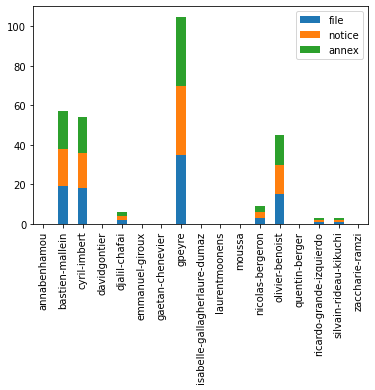

In [17]:
df = df.T # pour inverser colonnes et lignes
df.plot.bar(stacked = True)